In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from IPython.display import Image
from matplotlib import rcParams
from scipy.sparse import diags
import scipy.stats as ss
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
rcParams['legend.title_fontsize']= 'xx-large'
%matplotlib inline
#rcParams.keys()

In [2]:
from scipy.integrate import solve_bvp
from scipy.optimize import fsolve


# Resolvamos el problema de Bratus
$$y'' + k  e^y = 0$$ con condiciones de contorno dadas por:
$$y(0) = y(1) = 0$$

In [3]:
def fun(x, y):
    return np.vstack((y[1], -np.exp(y[0])))

In [4]:
def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [6]:
x = np.linspace(0, 1, 5)
y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
y_b[0] = 3
res_a = solve_bvp(fun, bc, x, y_a)
res_b = solve_bvp(fun, bc, x, y_b)

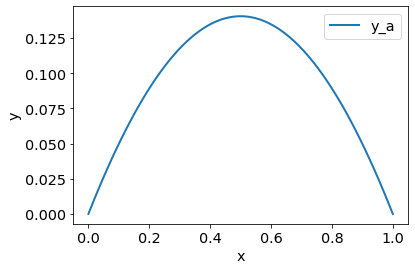

In [44]:
x_plot = np.linspace(0, 1, 100)
y_plot_a = res_a.sol(x_plot)[0]
y_plot_b = res_b.sol(x_plot)[0]
import matplotlib.pyplot as plt
plt.plot(x_plot, y_plot_a, label='y_a')
#plt.plot(x_plot, y_plot_b, label='y_b')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [41]:
def NewtonBratusDF(M):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    x1 = np.arange(a+h/2,b, h)
    eps = 0.01 #tolerancia método iterativo
    # datos estacionarios
    k=1
    #condición inicial y de frontera
    #Uinic = lambda x : 0.01*(x*(L-x)+4)
    #Uinic = lambda x : x**2*(L-x)**2+4
    Xu = ss.norm(0.5,0.40)
    #Uinic = Xu.pdf(x)
    Uinic = 0*np.ones_like(x)
    Ua= lambda t : 0*t+0
    Ub= lambda t : 0*t+0
    U=Uinic
    Uamp = np.zeros(m+1)
    Uamp[0] = Ua(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[-1] = Ub(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[1:-1] = U

    fig = plt.figure(figsize = (18, 6))
    f1 = fig.add_subplot(121)
    f1.plot(Xamp,Uamp)

    #time.sleep(0.5)
    f2 = fig.add_subplot(122)
    #f2.plot(Xamp,Uamp, label = 'CI for  v')


    tol = 1
    U0 = Uamp.copy()
    #entro al método iterativo de Newton, punto fijo
    while(tol > eps):
        #montaje de la matriz evolutiva primero resolvemos para v
        Aleft = np.ones(M-1)
        Adiag = -2+k*h**2*np.e**U0[1:-1]
        A = diags([Aleft,Adiag, Aleft],[-1,0,1]).toarray()
        B = k*h**2*(U0[1:-1]-1)*np.e**U0[1:-1]
        U =np.dot(np.linalg.inv(A),B)#solución del sistema lineal
    
        #calculo del error relativo
        Ures = U-U0[1:-1]
        Ures2 = Ures**2
        U2 = U**2
        tol = np.sqrt(h*np.sum(Ures2))/np.sqrt(h*np.sum(U2))
        print(tol)
        U0[1:-1] = U.copy()
        #tol=0.00001

    #time.sleep(1)
    #actualizamos el paso en tiempo
    Uamp = np.zeros_like(Xamp)
    Uamp[0] =0# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[-1] = 0# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[1:-1] = U
    #f1.plot(Xamp,Uamp)
        #time.sleep(0.5)
    f2.plot(Xamp,Uamp)
    plt.show()

1.0
0.0071198389164940055


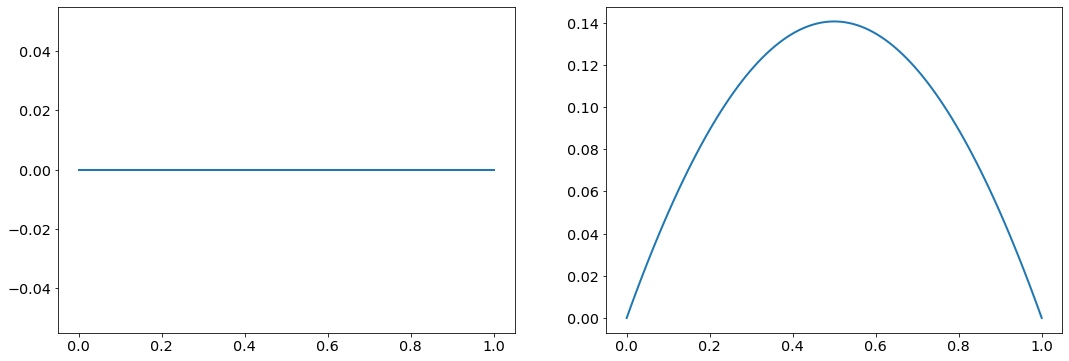

In [42]:
NewtonBratusDF(100)

$$y'' + k^2  y = 0$$
$$y(0) = y(1) = 0$$

Consideremos la solución del problema de valores en la frontera con solución $y(x) = A\sin(kx)$ con $k = \pi n$ con $n \in \mathbb{N}$.
Así, $y'(x) = kA\cos(kx)$. Por tanto, $y'(0)=kA$

In [8]:
def fun(x, y, p):
    k = p[0]
    return np.vstack((y[1], -k**2 * y[0]))

In [9]:
def bc(ya, yb, p):
    k = p[0]
    return np.array([ya[0], yb[0], ya[1] - k])

In [10]:
x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))
y[0, 1] = 1
y[0, 3] = -1

In [11]:
sol = solve_bvp(fun, bc, x, y, p=[36])

In [12]:
sol.p[0]

18.849883801393485

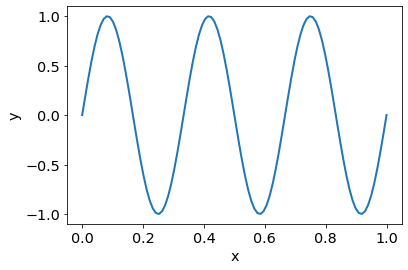

In [13]:
x_plot = np.linspace(0, 1, 100)
y_plot = sol.sol(x_plot)[0]
plt.plot(x_plot, y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

[[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.   -1.99  1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.   -1.99  1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.   -1.99  1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.   -1.99  1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.   -1.99  1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.   -1.99  1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.   -1.99  1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    1.   -1.99  1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.   -1.99  1.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.  ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


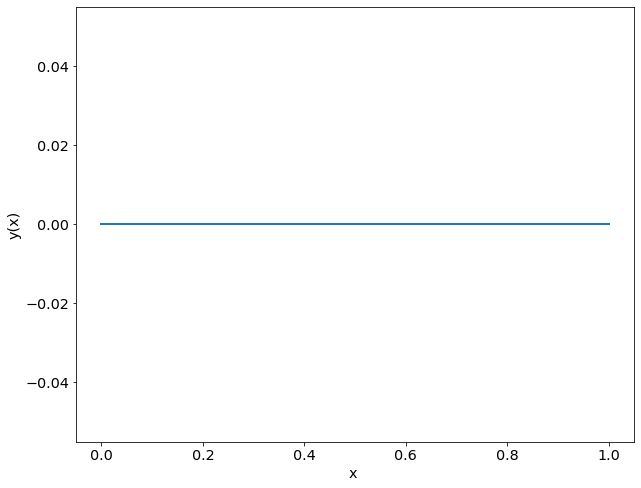

In [14]:
n = 10
h = (1-0) / n
k = 1
# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2+h**2*k**2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
#b[-1]=0
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 1, 11)

plt.figure(figsize=(10,8))
plt.plot(t, y)
#plt.plot(5, 50, 'ro')
plt.xlabel('x ')
plt.ylabel('y(x)')
plt.show()

apm 181.55.21.11_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            2
   Variables    :          200
   Intermediates:            0
   Connections  :            0
   Equations    :          200
   Residuals    :          200
 
 Number of state variables:          79200
 Number of total equations: -        79200
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  3.26832E-21  3.43845E+02
    1  3.26832E-21  3.43845E+02
 Successful solution
 
 ------------------

<ipython-input-15-c49fcade0f23>:71: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "Transparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('wave_3d.png', Transparent=True)
<ipython-input-15-c49fcade0f23>:78: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "Transparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('wave_contour.png', Transparent=True)


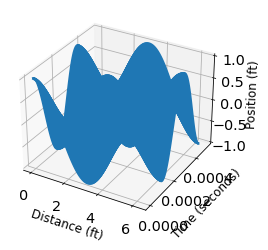

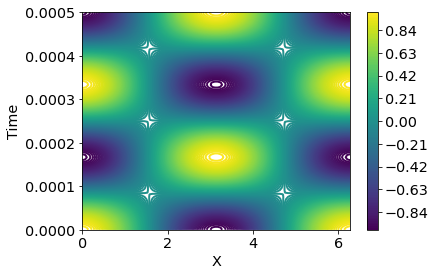

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import*
from mpl_toolkits.mplot3d.axes3d import Axes3D

tf = .0005
npt = 100
xf = 2*np.pi
npx = 100
time = np.linspace(0,tf,npt)
xpos = np.linspace(0,xf,npx)

m = GEKKO()
m.time = time

def phi(x):
    phi = np.cos(x)
    return phi

def psi(x):
    psi = np.sin(2*x)
    return psi

x0 = phi(xpos)
v0 = psi(xpos)
dx = xpos[1]-xpos[0]
a = 18996.06
c = m.Const(value = a)
dx = m.Const(value = dx)
u = [m.Var(value = x0[i]) for i in range(npx)]
v = [m.Var(value = v0[i]) for i in range(npx)]
[m.Equation(u[i].dt()==v[i]) for i in range(npx)]
m.Equation(v[0].dt()==c**2 * \
           (u[1] - 2.0*u[0] + u[npx-1])/dx**2 )
[m.Equation(v[i+1].dt()== \
            c**2 * (u[i+2] - 2.0*u[i+1] + u[i])/dx**2) \
            for i in range(npx-2) ]
m.Equation(v[npx-1].dt()== c**2 * \
           (u[npx-2] - 2.0*u[npx-1] + u[0])/dx**2 )
m.options.imode = 4
m.options.solver = 1
m.options.nodes = 3

m.solve()

# re-arrange results for plotting
for i in range(npx):
    if i ==0:
        ustor = np.array([u[i]])
        tstor = np.array([m.time])
    else:
        ustor = np.vstack([ustor,u[i]])
        tstor = np.vstack([tstor,m.time])
for i in range(npt):
    if i == 0:
        xstor = xpos
    else:
        xstor = np.vstack([xstor,xpos])
xstor = xstor.T
t = tstor
ustor = np.array(ustor)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.set_xlabel('Distance (ft)', fontsize = 12)
ax.set_ylabel('Time (seconds)', fontsize = 12)
ax.set_zlabel('Position (ft)', fontsize = 12)
ax.set_zlim((-1,1))
p = ax.plot_wireframe(xstor,tstor,ustor,\
                      rstride=1,cstride=1)
fig.savefig('wave_3d.png', Transparent=True)

plt.figure()
plt.contour(xstor, tstor, ustor, 150)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Time')
plt.savefig('wave_contour.png', Transparent=True)
plt.show()

In [16]:
try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain
pipmain(['install','gekko'])
# to upgrade: pipmain(['install','--upgrade','gekko'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

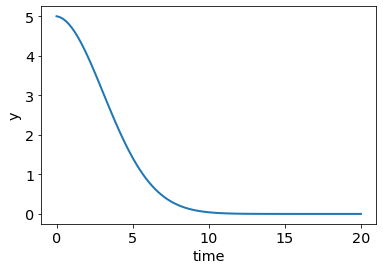

In [62]:
m = GEKKO()
k = 10
m.time = np.linspace(0,20,100)

y = m.Var(value=5)
t = m.Param(value=m.time)
m.Equation(k*y.dt()==-t*y)
m.options.IMODE=4
m.solve(disp=False)

plt.plot(m.time,y.value)
plt.xlabel('time')
plt.ylabel('y')
plt.show()

apm 190.147.200.20_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :          101
   Intermediates:            0
   Connections  :            0
   Equations    :          100
   Residuals    :          100
 
 Number of state variables:          20000
 Number of total equations: -        20000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains 

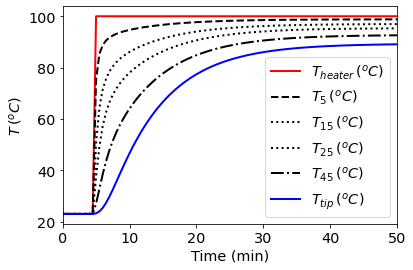

In [63]:
# The parabolic PDE equation describes the evolution of temperature
#  for the interior region of the rod. This model is modified to make
#  one end of the rod fixed and the other temperature at the end of the
#  rod calculated.
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

# Steel rod temperature profile
# Diameter = 3 cm
# Length = 10 cm
seg      = 100              # number of segments
T_melt   = 1426             # melting temperature of H13 steel
pi       = 3.14159          # pi
d        = 3 / 100          # rod diameter (m)
L        = 10 / 100         # rod length (m)
L_seg    = L / seg          # length of a segment (m)
A        = pi * d**2 / 4    # rod cross-sectional area (m)
As       = pi * d * L_seg   # surface heat transfer area (m^2)
heff     = 5.8              # heat transfer coeff (W/(m^2*K))
keff     = 28.6             # thermal conductivity in H13 steel (W/m-K)
rho      = 7760             # density of H13 rod steel (kg/m^3)
cp       = 460              # heat capacity of H13 steel (J/kg-K)
Ts       = 23               # temperature of the surroundings (°C)
c2k      = 273.15           # Celcius to Kelvin

m = GEKKO()  # create GEKKO model

tf = 3000
nt = int(tf/30) + 1
m.time = np.linspace(0,tf,nt)
Th = m.MV(ub=T_melt)        # heater temperature (°C)    
Th.value = np.ones(nt) * 23 # start at room temperature
Th.value[10:] = 100         # step at 300 sec

T = [m.Var(23) for i in range(seg)] # temperature of the segments (°C)

# Energy balance for the rod (segments)
# accumulation =
#    (heat gained from upper segment)
#  - (heat lost to lower segment)
#  - (heat lost to surroundings)
# Units check
# kg/m^3 * m^2 * m * J/kg-K * K/sec =
#     W/m-K   * m^2 *  K / m
#  -  W/m-K   * m^2 *  K / m
#  -  W/m^2-K * m^2 *  K

# first segment
m.Equation(rho*A*L_seg*cp*T[0].dt() == \
               keff*A*(Th-T[0])/L_seg \
             - keff*A*(T[0]-T[1])/L_seg \
             - heff*As*(T[0]-Ts))
# middle segments
m.Equations([rho*A*L_seg*cp*T[i].dt() == \
               keff*A*(T[i-1]-T[i])/L_seg \
             - keff*A*(T[i]-T[i+1])/L_seg \
             - heff*As*(T[i]-Ts) for i in range(1,seg-1)])
# last segment
m.Equation(rho*A*L_seg*cp*T[seg-1].dt() == \
             keff*A*(T[seg-2]-T[seg-1])/L_seg \
           - heff*(As+A)*(T[seg-1]-Ts))

# simulation
m.options.IMODE = 4
m.solve()

# plot results
plt.figure()
tm = m.time / 60.0
plt.plot(tm,Th.value,'r-',label=r'$T_{heater}\,(^oC)$')
plt.plot(tm,T[5].value,'k--',label=r'$T_5\,(^oC)$')
plt.plot(tm,T[15].value,'k:',label=r'$T_{15}\,(^oC)$')
plt.plot(tm,T[25].value,'k:',label=r'$T_{25}\,(^oC)$')
plt.plot(tm,T[45].value,'k-.',label=r'$T_{45}\,(^oC)$')
plt.plot(tm,T[-1].value,'b-',label=r'$T_{tip}\,(^oC)$')
plt.ylabel(r'$T\,(^oC$)')
plt.xlabel('Time (min)')
plt.xlim([0,50])
plt.legend(loc=4)
plt.show()